In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# load dataset into Pandas DataFrame
df = pd.read_csv('Customers Cluster.csv',index_col = 'ID')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Gender    200 non-null    object 
 1   Age       200 non-null    int64  
 2   Income    200 non-null    int64  
 3   Spending  200 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 7.8+ KB


In [19]:
df.head()

,Gender,Age,Income,Spending
ID,,,,
1,Female,47,600240,0.16
2,Male,60,150060,0.04
3,Male,63,240096,0.51
4,Male,48,270108,0.46
5,Female,35,105042,0.35


In [35]:
df.isnull().sum()

Gender      0
Age         0
Income      0
Spending    0
dtype: int64

In [51]:
#menstandarisasi fitur sblm menerapkan PCA
from sklearn.preprocessing import StandardScaler
features = ['Age','Income','Spending']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['Gender']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [53]:
Standardizing = pd.DataFrame(data = x, columns = ['Age','Income','Spending'])

In [54]:
Standardizing

,Age,Income,Spending
0,0.584899,2.268791,-1.327697
1,1.517865,-1.166458,-1.793556
2,1.733166,-0.479408,0.031057
3,0.656665,-0.250391,-0.163051
4,-0.276302,-1.509983,-0.590088
...,...,...,...
195,-0.993969,0.436658,-0.628909
196,-0.132768,1.390894,-0.706552
197,2.020232,0.054964,0.341630
198,0.226065,0.971030,-1.172411


In [55]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [56]:
principalDf

,principal component 1,principal component 2
0,1.241825,2.333923
1,2.394820,-1.051593
2,1.225368,-0.427781
3,0.591028,-0.224147
4,0.294060,-1.494256
...,...,...
195,-0.278957,0.429946
196,0.338385,1.411957
197,1.183158,0.102887
198,0.941012,1.020997


In [57]:
#Concatenating dataframes along columns to make finalDf before plotting the data.
finalDf = pd.concat([principalDf, df[['Gender']]], axis = 1)

In [58]:
finalDf

,principal component 1,principal component 2,Gender
0,1.241825,2.333923,NaN
1,2.394820,-1.051593,Female
2,1.225368,-0.427781,Male
3,0.591028,-0.224147,Male
4,0.294060,-1.494256,Male
...,...,...,...
196,0.338385,1.411957,Female
197,1.183158,0.102887,Female
198,0.941012,1.020997,Male
199,1.636203,1.129144,Male


In [59]:
import matplotlib.pyplot as plt

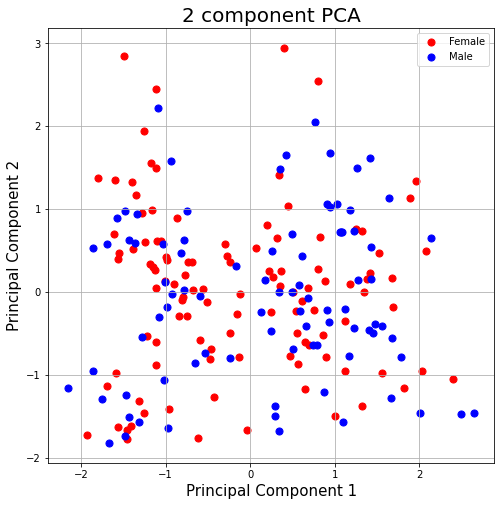

In [60]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Female', 'Male']
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Gender'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [62]:
#total 95.80% of the information
pca.explained_variance_ratio_

array([0.44266167, 0.33308378])